<a href="https://colab.research.google.com/github/pleabargain/ipynb/blob/master/simple_time_line_in_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

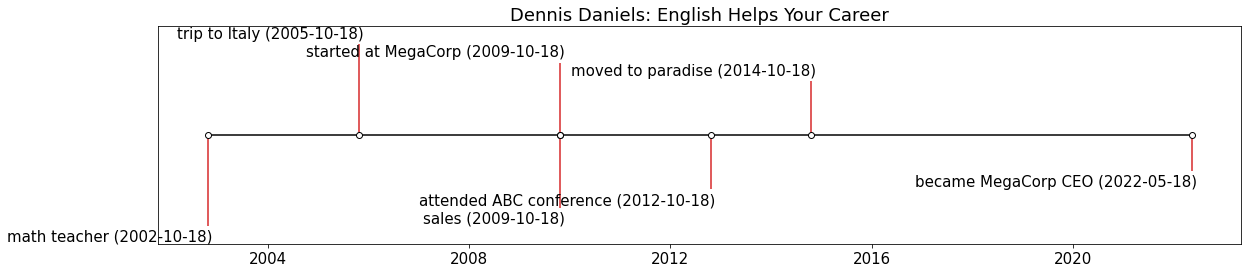

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 15}


plt.rc('font', **font)


names = ["math teacher",
         "trip to Italy",
         "sales",
         "started at MegaCorp",
         "attended ABC conference",
        "moved to paradise",
        "became MegaCorp CEO",
         ]

dates = ["2002-10-18", 
         "2005-10-18", 
         "2009-10-18", 
         "2009-10-18", 
         "2012-10-18", 
         "2014-10-18", 
         "2022-05-18", 
        #  random_date_generator(), 
        
         ]

# how to catch errors in dates and name formatting BEFORE they throw an error?

namedates = []
for i in range(len(names)):
    namedates.append("{} ({})".format(names[i], dates[i]))


# Convert date strings (e.g. 2014-10-18) to datetime
dates = [datetime.strptime(d, "%Y-%m-%d") for d in dates]

# Choose some nice levels
levels = np.tile([-5, 5, -4, 4, -3, 3, -2, 2, -1, 1],
                 int(np.ceil(len(dates)/6)))[:len(dates)]

# Create figure and plot a stem plot with the date
fig, ax = plt.subplots(figsize=(18.8, 4), constrained_layout=False)
ax.set(title="Dennis Daniels: English Helps Your Career")

markerline, stemline, baseline = ax.stem(dates, levels,
                                         linefmt="C3-", basefmt="k-",
                                         use_line_collection=True)

plt.setp(markerline, mec="k", mfc="w", zorder=3)

# Shift the markers to the baseline by replacing the y-data by zeros.
markerline.set_ydata(np.zeros(len(dates)))

# annotate lines
vert = np.array(['top', 'bottom'])[(levels > 0).astype(int)]
for d, l, r, va in zip(dates, levels, namedates, vert):
    ax.annotate(r, xy=(d, l), xytext=(5, np.sign(l)*3),
                textcoords="offset points", va=va, ha="right")

# remove y axis and spines
ax.get_yaxis().set_visible(False)
for spine in ["left", "top", "right"]:
    ax.spines[spine].set_visible(True)

ax.margins(y=0.1)
plt.subplots_adjust(left=0.1, right= 0.9)
plt.show()